**Xiangyi Cheng (xxc283)**

# Concept and Background

Convolution between an image and a Gaussian kernel is one of the most crucial calculations in image blurring. Specically, each pixel in the image gets multipiled by the value of the Guassian kernel in the corresponding position. The result value replaces the center pixel of the image where the kernel overlaps.

However, this approach requires much time and calculation which is not efficient. Fourier transform shows advantage on this field to do convolution between the image and kernel. Fourier transform convolution states the principle that multiplication in the frequency domain corresponds to convolution in the time domain. With this basic idea, calculations are simplified and efficiency are obviously improved.  

To prove the Fourier transformation convolution theorem, the image will be processed by both Fourier transformation approach and traditional approach and to compare them.

# Implement

## Fourier Transform Convolution

The useful libraries are loaded first. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import cv2

Then the image should be read in and identified its size.

In [5]:
img=cv2.imread('sydney.jpg',cv2.IMREAD_GRAYSCALE)
img_blurred=img.copy()
h,w=img.shape[:2]

The Gaussian filter is a 5x5 kernel, as defined below. The matrix is generated by a column matrix times a row matrix due to its symmetry and separability. $$kernel=\frac{1}{256}*\begin{pmatrix}1&4&6&4&1\\4&16&24&16&4\\6&24&36&24&6\\4&16&24&16&4\\1&4&6&4&1\end{pmatrix}$$

In [6]:
# set the Gaussian filter
Gaussian=1/256.*np.matrix('1;4;6;4;1')*np.matrix('1 4 6 4 1')

Since the dimensions of the image are different from that of the kernel. Both of the them should be padded to get the same size. The dimensions of padded matrix should at least be $(M_{img}+m_{kernel}-1)*(N_{img}+n_{kernel}-1)$.

In [8]:
kernel_pad_m=h-1
kernel_pad_n=w-1
img_pad_width=len(Gaussian)-1

kernel_pad=np.pad(Gaussian,((0,kernel_pad_m),(0,kernel_pad_n)),'constant')
img_pad=np.pad(img,((0,img_pad_width),(0,img_pad_width)),'constant')

Do the fourier transform for both the padded image and kernel.

In [9]:
# do fourier transformation 
img_frq=fftpack.fft2(img_pad)
kernel_frq=fftpack.fft2(kernel_pad)

Once getting the Fourier transform of the image and kernel, multiply them as described before to get the convolution in frequency domain.

In [10]:
# compute the production of kernel_frq and img_frq
pro_frq= np.multiply(img_frq,kernel_frq)

Do the inverse Fourier transform to get the convolution in the time domain so that the image is reconstructed. 

In [11]:
# inverse the fourier transformation
img_processed=abs(fftpack.ifft2(pro_frq))

Show the blurred image with Fourier transform convolution.

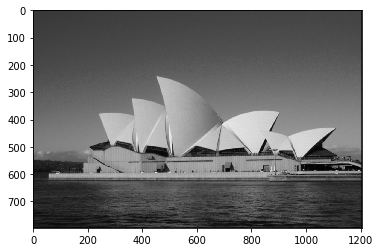

In [12]:
#show processed image
cv2.imwrite('sydney_fft.jpg',img_processed)
img_fft=cv2.imread('sydney_fft.jpg')
img_fft1=cv2.cvtColor(img_fft,cv2.COLOR_BGR2RGB)
plt.imshow(img_fft1)
plt.show()

## Traditional Convolution

The traditional approach to do convolution was described in Exercise 1 in A1. The code is as shown at below:

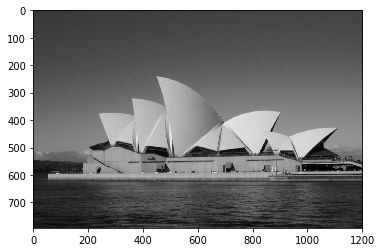

In [13]:
# traditional convolution
img_blurred=img.copy()

center_poc=(len(Gaussian)-1)/2

# add two rows above and below the image respectively. add two colums on left and right sides of the image.
# reshape a zero matrix in (h+2,w+2) dimension.
img_reshape=np.zeros((h+2*center_poc,w+2*center_poc))

# give the original pixel values from the original image to the corresponding position of the new matrix.
for k in range(0,h):
	for l in range(0,w):
		img_reshape[k+center_poc,l+center_poc]=img_blurred.item(k,l)

# do the blurring process
for i in range(0,h):
	for j in range(0,w):
		sum=0
		for h1 in range(0,len(Gaussian)):
			for w1 in range(0,len(Gaussian)):
				pixel_bg=img_reshape.item(i+h1,j+w1)
				pixel_kernel=Gaussian[h1,w1]
				sum=sum+(pixel_bg*pixel_kernel) 
		img_blurred.itemset((i,j),sum)

cv2.imwrite('sydney_blurred.jpg',img_blurred)
img_trad=cv2.imread('sydney_blurred.jpg')
img_trad1=cv2.cvtColor(img_trad,cv2.COLOR_BGR2RGB)
plt.imshow(img_trad1)
plt.show()

Show the orginal image, processed image applied Fourier transform convolution, processed image applied traditional convolution and the difference between two blurred images.

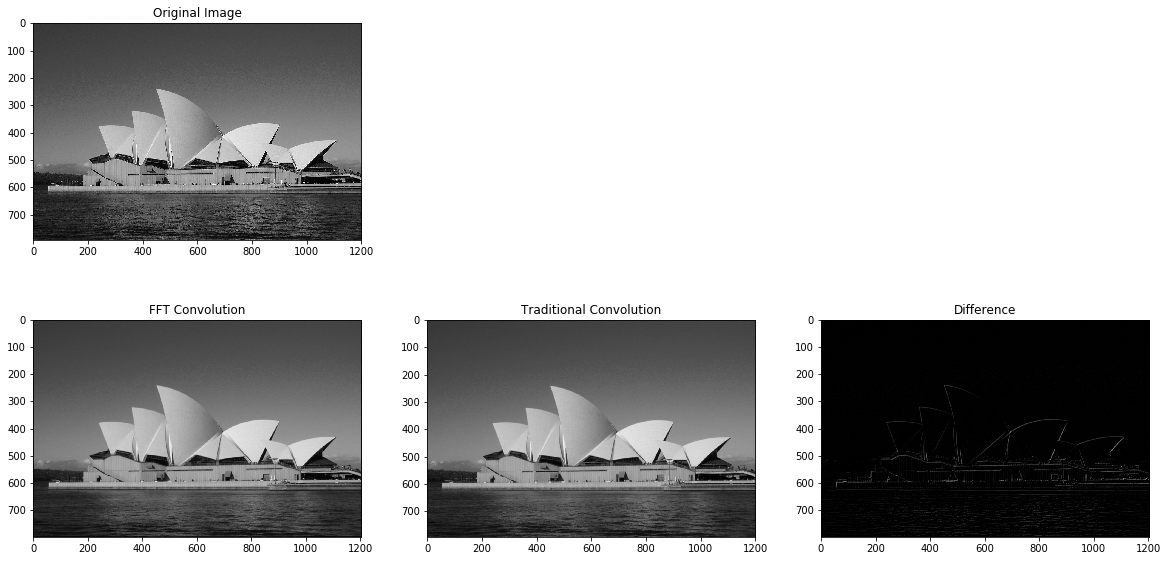

In [22]:
# show the difference between fft and traditional approach doing convolution
img_trad=img_blurred
img_fft=img_processed
img_trad=np.pad(img_trad,((0,img_pad_width),(0,img_pad_width)),'constant')
fft_trad_diff=img_trad-img_fft
cv2.imwrite('diff_fft_trad.jpg',fft_trad_diff)
fft_trad_diff=cv2.imread('diff_fft_trad.jpg')
fft_trad_diff=cv2.cvtColor(fft_trad_diff,cv2.COLOR_BGR2RGB)
original=cv2.imread('gray_sydney.jpg')
original1=cv2.cvtColor(original,cv2.COLOR_BGR2RGB)
#####################################################################################################
#####################################################################################################
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(original1)
plt.title('Original Image')
plt.subplot(2,3,4)
plt.imshow(img_fft1)
plt.title('FFT Convolution')
plt.subplot(2,3,5)
plt.imshow(img_trad1)
plt.title('Traditional Convolution')
plt.subplot(2,3,6)
plt.imshow(fft_trad_diff)
plt.title('Difference')
plt.show()

# Conclusion and Analysis

Fourier transform convolution is applied to do blurring in the image compared to the traditional approach to do convolution. 

From the results, two convolution approaches both achieve the goal to blur the image. And we cannot tell any differences from them two with naked eyes. However, some distinctions show up once do the substract. Theoretically, they are equivalent while it shows error in practical. Although the error is tiny, the reasons behind the error should depend on how we do the padding to the image and kernel. The way I developed the traditional convolution is called "full convolution" mathematically. It may be differences between the full convolution and the FFT convolution with certain padding way.

Besides the differences in images, the advance about computional time costing is revealed clearly in FFT convolution. Compared to traditional convolution, it took much less time in computing FFT convolution. Therefore, FFT convolution is more efficient than traditional convolution, especially in blurring image.